In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings # this is used for informing us warning ,
warnings.filterwarnings("ignore")

# Loading the dataset 

In [38]:
df=pd.read_csv("hotel_bookings 2.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.shape # used to check rows and columns

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# here info [ we can see , there ius an error , in reserved_status_date , datatype in obejct , we have to change it in datetime/
#df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

df['reservaton_status_date'] = pd.to_datetime(df['reservation_status_date'],format='%d/%m/%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [39]:
# it is used for show numerical columns , but when you use (include=object you can onlu see object valyes
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [40]:
# you want to see objet columns
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())  # unique- ek function jo hum kisi bhi dataframe ke sath use kr skte hai 
    print('-'*50)   # to separable the line 

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
# to checking ,missing values
df.isnull().sum()  # sum is used for total values 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
if 'company' in df.columns and 'agent' in df.columns:
    df.drop(['company', 'agent'], axis=1, inplace=True)
else:
    print("Columns 'company' and 'agent' not found in DataFrame.")


In [42]:
# removing the columns  which does need of  -
#df.drop(['company','agent'],axis = 1, inplace =True)
#df.dropna(inplace=True) # removing missing values

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
df.describe() # show summary statistic show krta hai

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservaton_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [16]:
df= df[df['adr']<5000]

# DATA ANALYSIS AND VISUALIZATION

In [43]:
cancelled_perc =df['is_canceled'].value_counts(normalize =True)
print(cancelled_perc)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


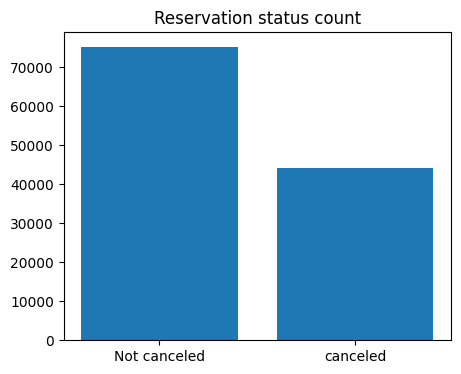

In [45]:

plt.figure(figsize =(5,4))
plt.title("Reservation status count")
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts())      
plt.savefig("reservation")

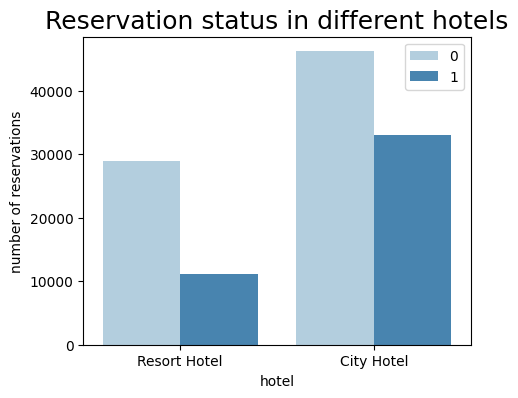

In [19]:
plt.figure(figsize =(5,4))
ax1 =sns.countplot(x='hotel',hue ='is_canceled',data=df, palette='Blues')
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels',size=18)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

plt.savefig("resevation_status")
plt.show()


In [46]:
resort_hotel =df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

In [47]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

In [48]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()


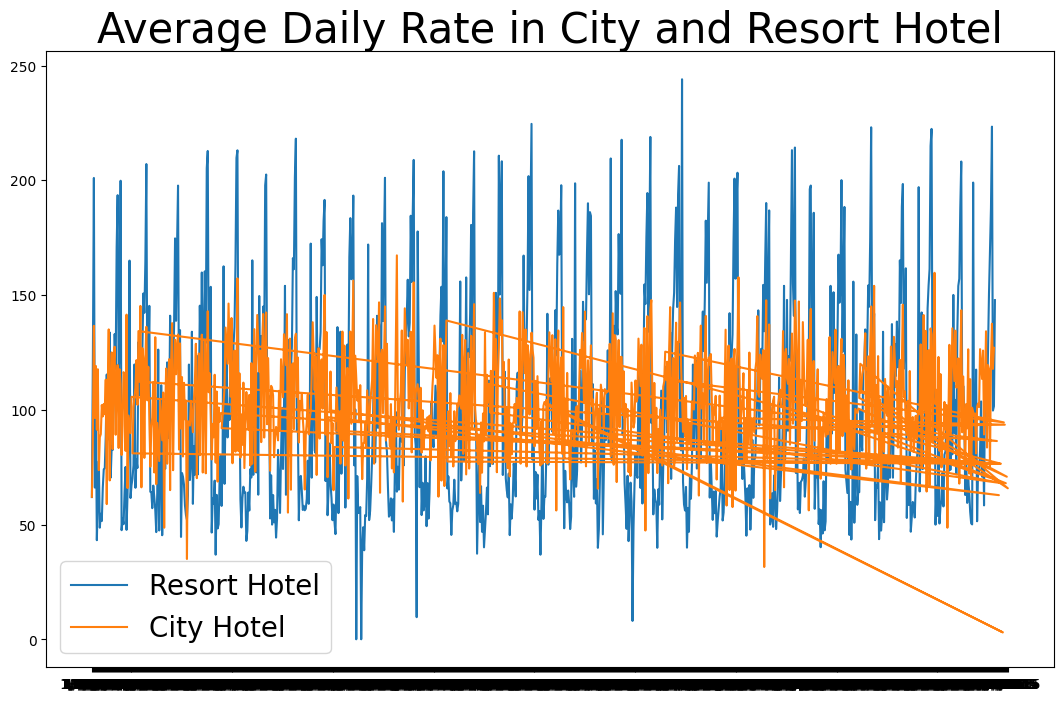

In [67]:
plt.figure(figsize = (13,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.savefig("Average Daily Rate")
plt.show()

<Figure size 800x500 with 0 Axes>

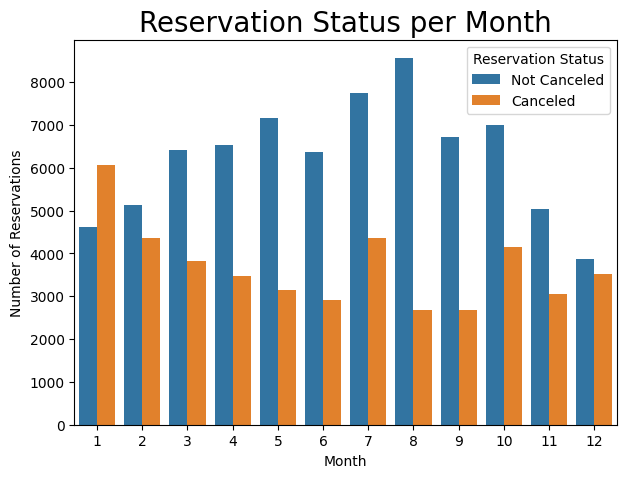

In [77]:
plt.figure(figsize=(8,5))
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')
df['month'] = df['reservation_status_date'].dt.month

plt.figure(figsize=(7,5))
ax1 = sns.countplot(x='month', hue='is_canceled', data=df)
ax1.legend(title='Reservation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.title('Reservation Status per Month', size=20)
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.savefig("Reservation Status per Month")
plt.show()

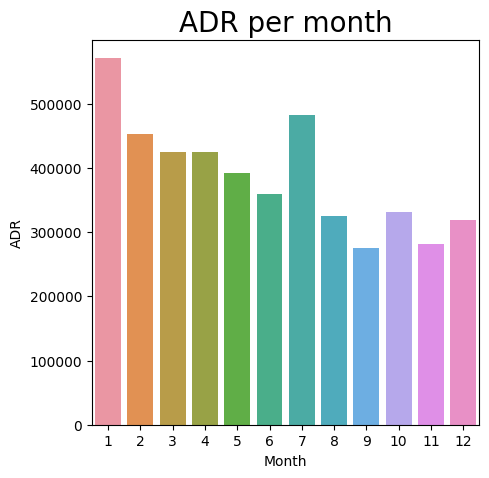

In [78]:
plt.figure(figsize=(5,5))
plt.title('ADR per month', fontsize=20)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('ADR')
plt.savefig("ADR per month")
plt.show()

# cancelation based on top 10 countries 

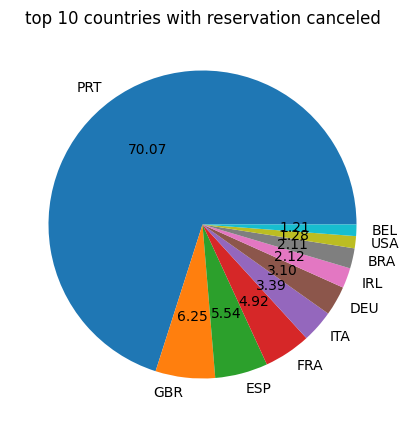

In [79]:
canceled_data = df[df['is_canceled'] ==1]
top_10_country= canceled_data['country'].value_counts()[:10]
plt.figure(figsize =(5,5))
plt.title('top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct ='%.2f', labels = top_10_country.index)
plt.savefig("countries with reservation canceled")
plt.show()

In [55]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [56]:
df['market_segment'].value_counts(normalize =True)


market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [57]:
canceled_data['market_segment'].value_counts(normalize= True)

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64

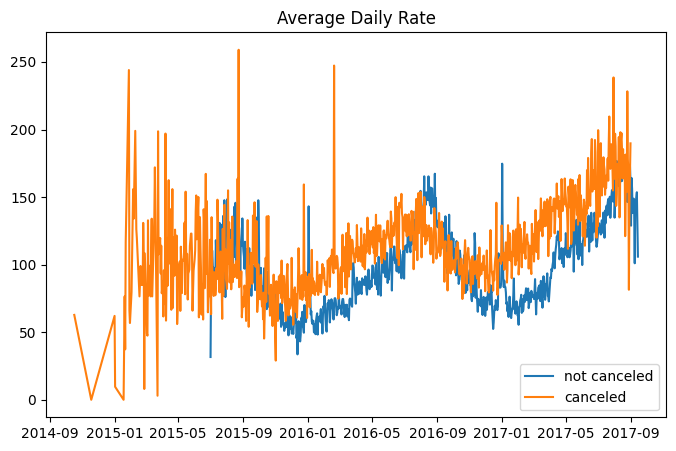

In [80]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace= True)
canceled_df_adr.sort_values('reservation_status_date',inplace =True)

not_canceled_data =df[df['is_canceled'] == 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace= True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace =True)

plt.figure(figsize =(8,5))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label ='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label ='canceled')
plt.legend()
plt.savefig("Average Daily Rate")
plt.show()

In [59]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr ['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date']<'2017-09')]               
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr ['reservation_status_date']>'2016') & (not_canceled_df_adr['reservation_status_date']<'2017-09')] 


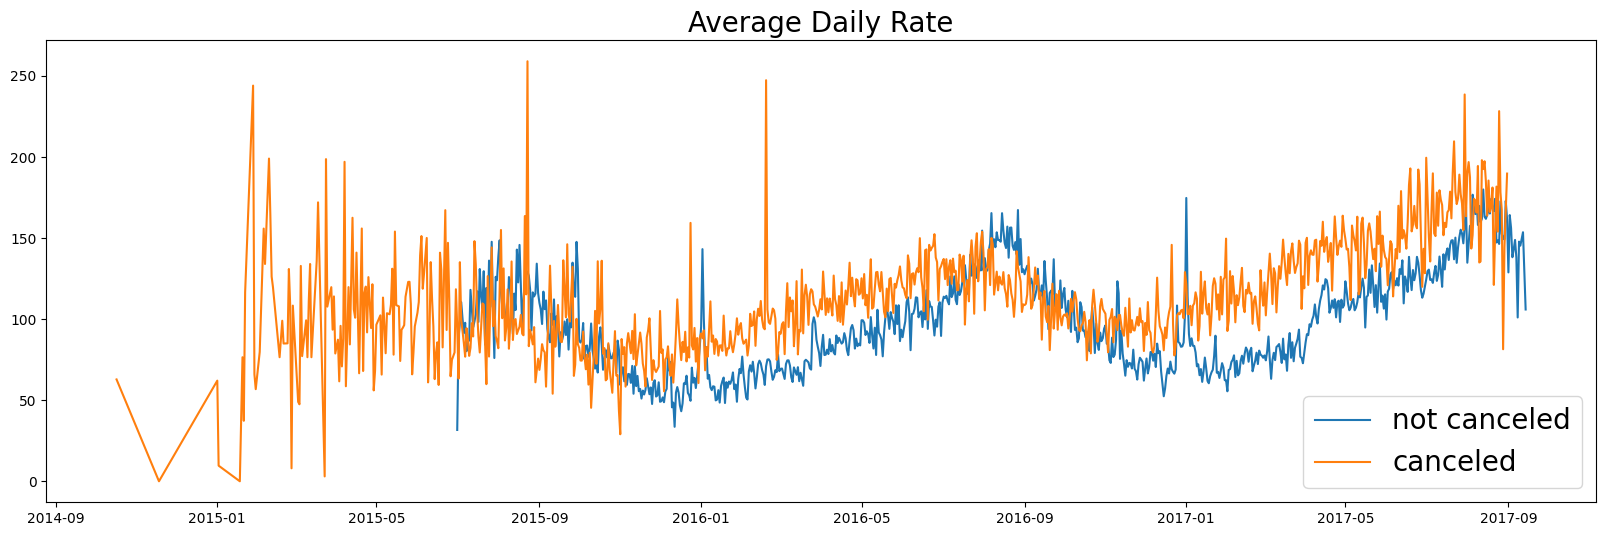

In [81]:
plt.figure(figsize =(20,6))

plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'],label ='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label ='canceled')
plt.legend(fontsize=20)
plt.title('Average Daily Rate',fontsize=20)
plt.savefig("Average Daily Rate of year 2016-2017")
plt.show()




